# A Billion stars in the Jupyter notebook -  demo for NAC 2017

In [1]:
1+2

3

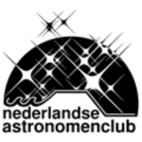

In [2]:
import IPython.display
IPython.display.Image(filename="nac-logo.png")

In [3]:
import ipywidgets as widgets
widgets.FloatSlider(min=0, max=10, value=2.1)

In [4]:
import vaex
import numpy as np
import matplotlib.pylab as plt
plt.style.use('bigfont')
%matplotlib inline

# Step 0: reading in data
vaex reads 'anything':
 * `ds = vaex.open('super_fast.hdf5')`
 * `ds = vaex.open('gadget_is_fine.hdf5')`
 * `ds = vaex.from_pandas(df)`
 * `ds = vaex.from_astropy_table(table)`
 * `ds = vaex.from_ascii('takes_hours.asc')`
 * `ds = vaex.from_csv('this_may_be_slow.csv')`
 * `ds = vaex.from_arrays(x=x, y=y)`
 * if everything fails, convert it using topcat

In [7]:
ds = vaex.open("/Users/maartenbreddels/src/vaex/data/Aq-A-2-999-shuffled-10percent.hdf5")
!ls -lh /Users/maartenbreddels/src/vaex/data/Aq-A-2-999-shuffled-10percent.hdf5

-rw-r--r--  1 maartenbreddels  staff   3.6G Dec 22  2015 /Users/maartenbreddels/src/vaex/data/Aq-A-2-999-shuffled-10percent.hdf5


In [8]:
len(ds)/1e6

60.686617

In [9]:
ds.count(), ds.mean("x"), ds.std("x")

(60686617.0, 56.86591070746136, 1.1415114676486118)

In [10]:
ds.count(binby="x")

array([  9.33300000e+03,   1.02670000e+04,   1.13110000e+04,
         1.39600000e+04,   1.34980000e+04,   1.67740000e+04,
         2.14840000e+04,   1.93420000e+04,   2.18030000e+04,
         3.85570000e+04,   2.96320000e+04,   2.72450000e+04,
         3.68950000e+04,   5.24680000e+04,   4.83120000e+04,
         5.91570000e+04,   5.21250000e+04,   5.99210000e+04,
         4.72140000e+04,   4.71870000e+04,   6.23720000e+04,
         1.06843000e+05,   7.96440000e+04,   8.34880000e+04,
         1.06151000e+05,   1.14691000e+05,   1.19834000e+05,
         1.87615000e+05,   3.95401000e+05,   2.38574000e+05,
         1.84390000e+05,   1.24368000e+05,   1.33381000e+05,
         1.24873000e+05,   1.35396000e+05,   1.67708000e+05,
         1.44554000e+05,   1.64197000e+05,   1.89999000e+05,
         2.38394000e+05,   3.35019000e+05,   5.32797000e+05,
         7.13205000e+05,   4.17005000e+05,   4.97706000e+05,
         4.38908000e+05,   7.01647000e+05,   7.67070000e+05,
         6.64698000e+05,

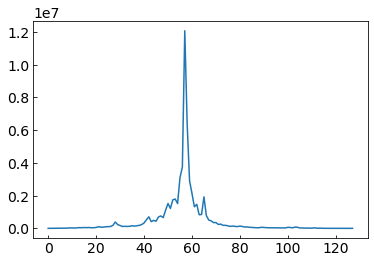

In [11]:
plt.plot(_)

In [ ]:
# ds.plot1d("x")

In [12]:
counts = ds.count(binby=["x", "y"])
counts

array([[  21.,   62.,   86., ...,   89.,   36.,   82.],
       [  34.,   45.,   93., ...,   24.,   30.,   46.],
       [  31.,   94.,   67., ...,   36.,   29.,   56.],
       ..., 
       [  53.,  110.,   51., ...,    0.,    1.,    1.],
       [ 167.,   65.,   53., ...,    1.,    0.,    0.],
       [  86.,  786.,  116., ...,    2.,    1.,    0.]])

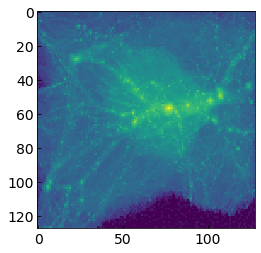

In [13]:
plt.imshow(np.log10(counts+1))

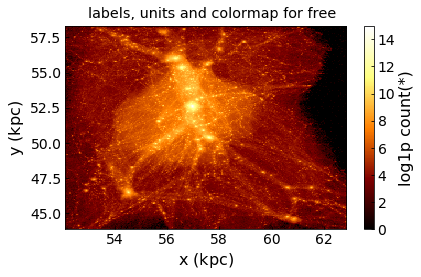

In [14]:
ds.plot("x", "y", f="log1p", title='labels, units and colormap for free')

# Interactive
Based on https://github.com/bloomberg/bqplot

In [15]:
# based on bqplot library
ds.plot_widget("x", "y", f="log")

In [16]:
ds.mean("x", selection=True)

56.889030611076926

In [ ]:
ds.select("x > 57")

In [18]:
ds.select_nothing()

In [17]:
ds.plot_widget("x", "y", "z", type="slice", z_shape=24,
               what="mean(vz)", colormap="viridis")

# A Billion stars in the Jupyter notebook


In [ ]:
import vaex
gaia = vaex.open("ws://gaia:9000/gaia-dr1")

In [ ]:
f"{len(gaia):,}" # (python3.6 f-string)

In [ ]:
ra_dec_limits = [[0, 360], [-90, 90]]

In [ ]:
gaia.plot_widget("ra", "dec", limits=ra_dec_limits)

In [ ]:
gaia.plot1d("phot_g_mean_mag", selection=False, n=True)
gaia.plot1d("phot_g_mean_mag", selection=True, show=True, n=True)

In [19]:
!open billion-stars-remote.mov

# Helmi & de Zeeuw 2000
Simulation of a stellar halo by 33 accreted satellites

In [20]:
ds = vaex.datasets.helmi_de_zeeuw.fetch()

In [21]:
ds.plot_widget("x", "y", f="log", limits=[-20, 20])

In [23]:
ds.plot_widget("Lz", "E", f="log")

# ipyvolume
 * 3d plotting for Python in the Jupyter notebook based on IPython widgets using WebGL
 * ~5 months old
 * Glyphs + Volume rendering (surfaces/meshes/lines are underway)
 * Live documentation http://ipyvolume.readthedocs.io/en/stable/ (since and thanks to ipywidgets 6)


In [24]:
import ipyvolume
import ipyvolume.pylab as plt3d
import numpy as np

In [25]:
# ipyvolume.example_ylm(lighting=True)

In [26]:
#!open CT_3D.html

In [27]:
from astropy.io import fits
hdulist = fits.open('ngc6946.fits')
cube = hdulist[0].data
#print(np.nanmin(cube), np.nanmax(cube))
cube[np.isnan(cube)] = 0
import scipy.ndimage
cube = scipy.ndimage.gaussian_filter(cube, 2.5)

In [28]:
plt3d.figure()
plt3d.volshow(cube, level=[0.3, 0.11, 0.19], 
                  opacity=[0.2, 0.1, 0.06], level_width=0.05, data_min=0.03, data_max=0.15)
plt3d.show()


In [29]:
N = 1000
x, y, z = np.random.random((3, N))

In [30]:
plt3d.figure()
scatter = plt3d.scatter(x, y, z, marker='box')
plt3d.show()

In [31]:
scatter.color = "green"
scatter.size = 10

In [32]:
import ipywidgets as widgets
widgets.FloatSlider(min=0.1, max=10)

In [33]:
widgets.jslink((scatter, 'size'), (_, 'value'))

In [ ]:
scatter.color = np.random.random((N,3))

In [ ]:
scatter.x = scatter.x + 0.2

In [34]:
scatter.size = 5
plt3d.save("boxes.html")

In [35]:
!open boxes.html

In [36]:
plt3d.figure()
plt3d.style.use('dark')
quiver = plt3d.quiver(*ipyvolume.datasets.animated_stream.fetch().data[:,::,::4], size=5)
plt3d.animate_glyphs(quiver, interval=200)
plt3d.show()

In [37]:
quiver.geo = "cat"

In [38]:
quiver.geo = "arrow"

In [39]:
plot3d = ds.plot_widget("x", "y", "z", vx="vx", vy="vy", vz="vz",
                        backend="ipyvolume", f="log1p", shape=100, smooth_pre=0.5)

In [41]:
plot3d.vcount_limits = [50, 100000]

In [ ]:
import ipywidgets as widgets
widgets.ColorPicker()

In [ ]:
widgets.jslink((plot3d.backend.quiver, 'color'), (_, 'value'))

# Conclusions
 * vaex: does statistics on N-dimensional grids with ~1 billion rows/sec
  * static plots using matplotlib
  * interactive plots using ipywidgets/bqplot/ipyvolume
 * ipyvolume: 3d plotting in the notebook
  * vaex backend or separate

# vaex  & ipyvolume
* maartenbreddels@gmail.com
* twitter @maartenbreddels
* vaex
 * http://vaex.astro.rug.nl
 * https://github.com/maartenbreddels/vaex
 * pip install —pre vaex / conda install -c conda-forge vaex
* ipyvolume
 * https://ipywidgets.readthedocs.io
 * https://github.com/maartenbreddels/ipyvolume
 * pip install ipyvolume / conda install -c conda-forge ipyvolume
 * if pip: jupyter nbextension enable --py --user ipyvolume (but really, use anaconda)
* Notebook: https://github.com/maartenbreddels/nac-2017

In [ ]:
plt3d.save("nac2017.html")

In [ ]:
!open nac2017.html

In [ ]:
7 1/2 min